In [1]:
import requests
import pandas as pd

In [4]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:

last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-07-16 16:27:07.197821')

In [10]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-07-16 17:00:00,32146.33,32264.53,31812.17,32060.33,153.037125,4.908721e+06
2021-07-16 18:00:00,32078.58,32143.03,31949.00,32067.21,108.266701,3.473072e+06
2021-07-16 19:00:00,32063.93,32087.34,31929.76,31987.89,84.362379,2.696333e+06
2021-07-16 20:00:00,31987.93,32094.42,31866.49,31938.31,52.364849,1.674512e+06
2021-07-16 21:00:00,31900.00,31977.75,31827.12,31843.09,44.006558,1.404103e+06


<AxesSubplot:xlabel='CloseTime'>

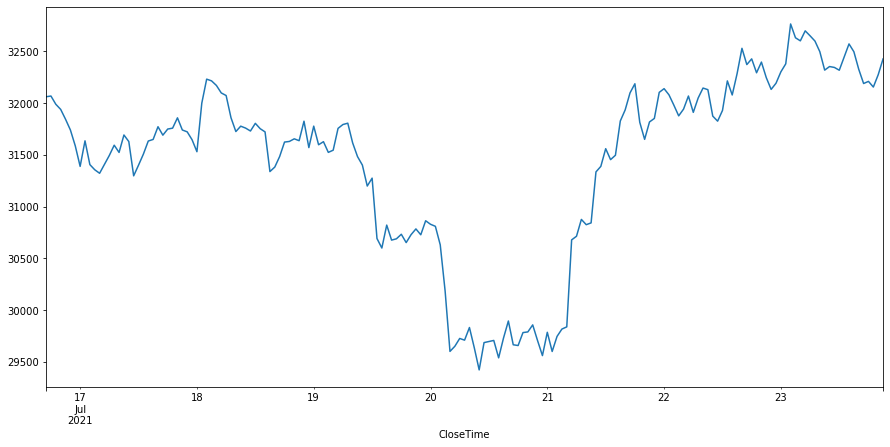

In [12]:
btc['ClosePrice'].plot(figsize=(15,7))

In [22]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [23]:
output_notebook()

Loading BokehJS ...

In [24]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [25]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name='Bitcoin')

writer.save()